In [3]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import label_binarize

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_data = pd.read_csv('/content/drive/MyDrive/ASL Dataset/sign_mnist_train/sign_mnist_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/ASL Dataset/sign_mnist_test/sign_mnist_test.csv')

In [25]:
train_data.isnull().sum()
train_data.shape[0]
label_counts = train_data['label'].value_counts()
print(label_counts)

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64


In [7]:
test_data.isnull().sum()
test_data.shape[0]

7172

In [8]:
def displayImage(image_path):
  image = Image.open(image_path).convert("RGB")
  plt.imshow(image)
  plt.axis('on')  # Hide axes for cleaner display
  plt.show()

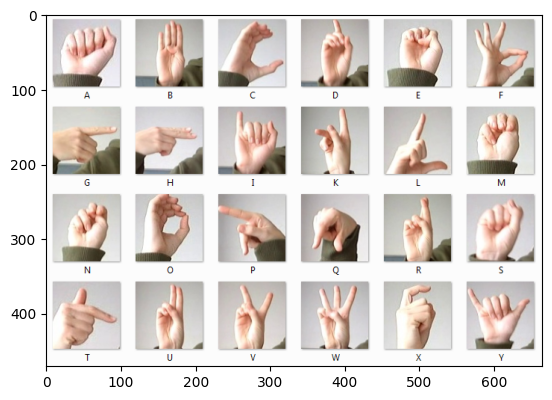

In [9]:
displayImage('/content/drive/MyDrive/ASL Dataset/amer_sign2.png')

In [10]:
X_train = train_data.drop(columns=['label'])
y_train = train_data['label']

X_test = test_data.drop(columns=['label'])
y_test = test_data['label']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KNN Model Evaluation
Accuracy: 0.8103736754043502
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       331
           1       0.94      0.94      0.94       432
           2       0.97      1.00      0.98       310
           3       0.77      0.93      0.84       245
           4       0.77      0.97      0.86       498
           5       0.98      0.95      0.96       247
           6       0.91      0.94      0.92       348
           7       0.94      0.97      0.95       436
           8       0.89      0.67      0.76       288
          10       0.88      0.58      0.70       331
          11       0.96      0.90      0.93       209
          12       0.76      0.52      0.62       394
          13       0.77      0.60      0.68       291
          14       1.00      0.91      0.95       246
          15       1.00      1.00      1.00       347
          16       0.95      1.00      0.97       164
       

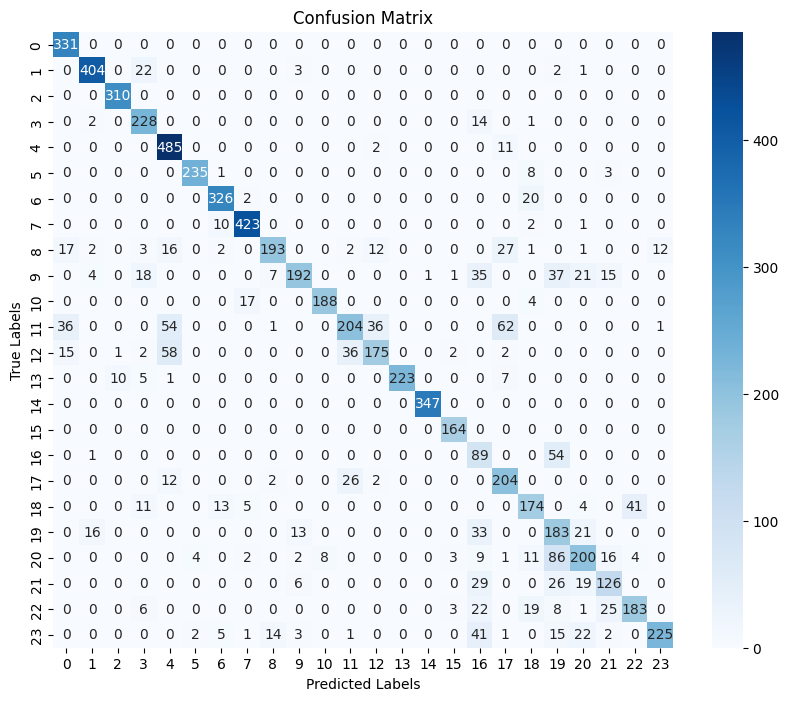

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print("KNN Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(24)], yticklabels=[str(i) for i in range(24)])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Linear SVM Model Evaluation
Accuracy: 0.8053541550474066
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       331
           1       1.00      0.95      0.97       432
           2       0.81      1.00      0.89       310
           3       0.96      1.00      0.98       245
           4       0.95      1.00      0.97       498
           5       0.67      0.87      0.76       247
           6       0.87      0.93      0.90       348
           7       0.98      0.92      0.95       436
           8       0.72      0.76      0.74       288
          10       0.78      0.50      0.61       331
          11       0.61      0.65      0.63       209
          12       0.84      0.74      0.79       394
          13       0.82      0.64      0.72       291
          14       0.89      0.70      0.78       246
          15       0.92      1.00      0.96       347
          16       0.93      1.00      0.96       164


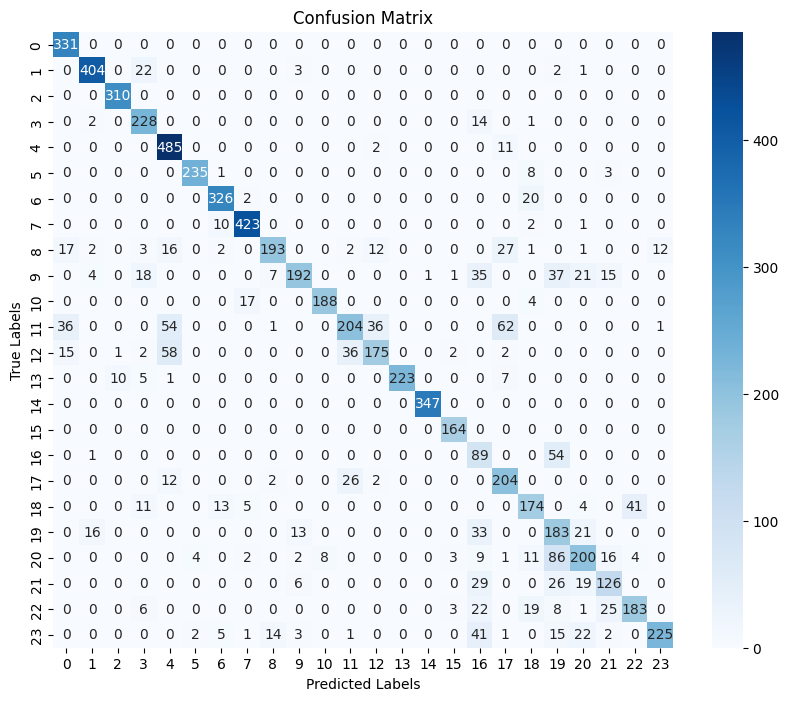

In [13]:
linear_svm_model = SVC(kernel='linear', class_weight='balanced', C=1)

linear_svm_model.fit(X_train, y_train)

y_pred_linear_svm = linear_svm_model.predict(X_test)

print("Linear SVM Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_linear_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_linear_svm))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(24)], yticklabels=[str(i) for i in range(24)])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [14]:
model = svm.SVC(class_weight= 'balanced', C=1, gamma="scale")
model.fit(X_train, y_train)


SVC(C=1, class_weight='balanced')

In [15]:
from sklearn.model_selection import cross_val_score

#5-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.99963577 0.99981788 0.99981788 0.99945365 0.99981788]
Mean cross-validation score: 0.9997086140957931


Accuracy: 84.8996 % 
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       331
           1       1.00      0.99      1.00       432
           2       0.95      1.00      0.97       310
           3       0.96      1.00      0.98       245
           4       0.95      0.99      0.97       498
           5       0.82      0.87      0.84       247
           6       0.93      0.94      0.94       348
           7       1.00      0.95      0.98       436
           8       0.81      0.88      0.85       288
           9       0.82      0.63      0.71       331
          10       0.89      1.00      0.94       209
          11       0.82      0.78      0.80       394
          12       0.90      0.66      0.76       291
          13       0.92      0.93      0.93       246
          14       1.00      1.00      1.00       347
          15       0.99      1.00      1.00       164
          16       0.26      0.47    

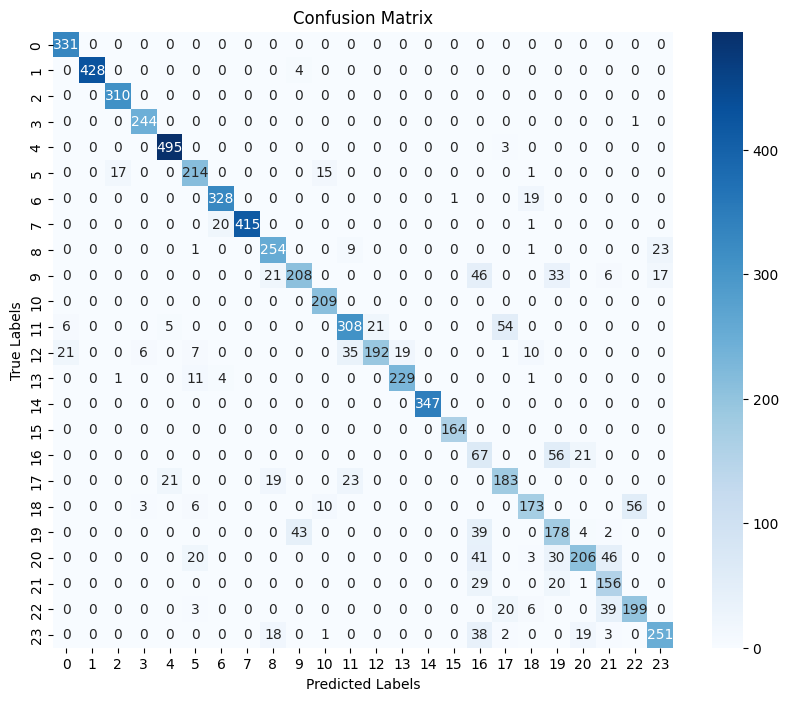

In [16]:
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.4f} % ")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(24)]))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(24)], yticklabels=[str(i) for i in range(24)])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [17]:
import cv2
import numpy as np
from PIL import Image, ImageOps


def predict_image(img_path, model):
    img = Image.open(img_path).convert("RGB")
    # img = ImageOps.exif_transpose(img)  # Correct orientation

    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.show()

    img = img.convert('L')  # Convert to grayscale

    plt.imshow(img, cmap='gray')
    plt.title('Grayscale Image')
    plt.show()

    img_resized = img.resize((28, 28), Image.LANCZOS)  # Resize to 28x28 pixels

    plt.imshow(img_resized, cmap='gray')
    plt.title('Resized Image (28x28)')
    plt.show()

    img_array = np.array(img_resized)  # Convert image to a numpy array

    img_normalized = np.array(img_resized) / 255.0  # Normalize to [0, 1]
    # print("Pre-Flatenning: ", img_normalized)

    img_flattened = img_normalized.flatten().reshape(1, -1)  # Flatten and reshape
    print("Post-Flatenning: ", img_flattened.shape)

    prediction = model.predict(img_flattened)  # Make predictions
    return prediction  # Return the predicted label

# Example usage:
# predicted_class = predict_image('path_to_your_image.jpg', svm_model)
# print(f"Predicted Class: {predicted_class}")


In [18]:
def translate_labels_to_text(labels):
    label_to_char = {i: chr(65 + i) for i in range(26)}
    translated_text = ''.join(label_to_char[label] for label in labels)

    return translated_text

# predicted_labels = [0, 1, 2, 3, 4]
# translated_text = translate_labels_to_text(predicted_labels)

# print(f"Translated Text: {translated_text}")


Translated Text: ABCDE


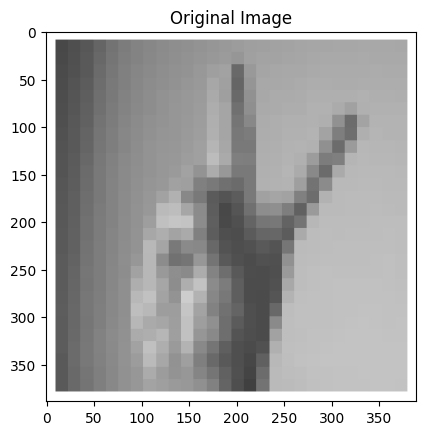

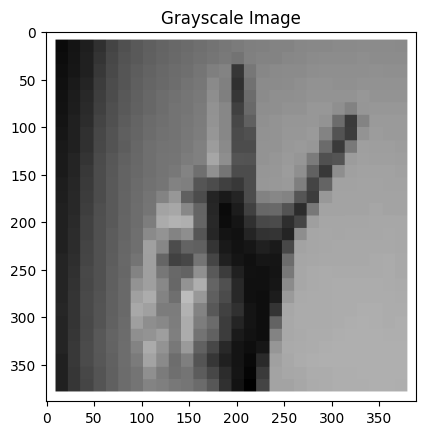

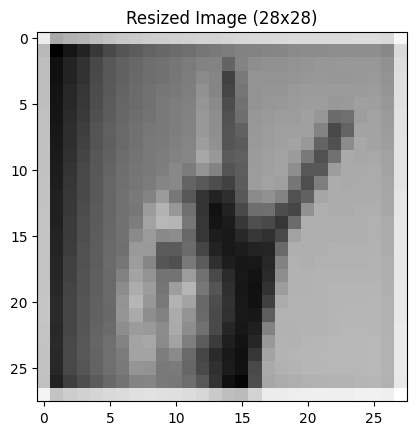

Post-Flatenning:  (1, 784)
Pre-translated result: [21]
Predicted label: V


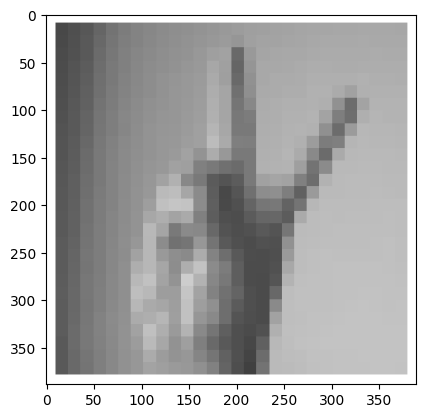

In [19]:
img_path = '/content/drive/MyDrive/ASL Dataset/Testing Images/testimg2.png'
result = predict_image(img_path, model)
print(f'Pre-translated result:', result)
print(f'Predicted label:', translate_labels_to_text(result))
displayImage(img_path)